In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
atus = pd.read_csv('atussum_0321.csv')

In [3]:
# Check that dataset opened correctly
atus

,TUCASEID,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,...,t181801,t181899,t189999,t500101,t500103,t500104,t500105,t500106,t500107,t509989
0,20030100013280,1,-1,44,2,2,60,2,2,-1,...,0,0,0,0,0,0,0,0,0,0
1,20030100013344,2,-1,40,2,1,41,1,2,2,...,0,0,0,0,0,0,0,0,0,0
2,20030100013352,1,-1,41,2,1,26,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,20030100013848,2,-1,39,2,2,36,4,-1,2,...,0,0,0,0,0,0,0,0,0,0
4,20030100014165,2,-1,45,2,1,51,1,2,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228450,20211212212479,-1,1,43,2,1,56,2,2,-1,...,0,0,0,0,0,0,0,0,0,0
228451,20211212212502,-1,1,44,2,1,69,5,-1,-1,...,0,0,0,0,0,0,0,0,0,0
228452,20211212212555,-1,1,43,2,1,57,1,2,-1,...,0,0,0,0,0,0,0,0,0,0
228453,20211212212567,-1,2,43,2,1,34,1,2,2,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Check the column datatypes, should be integers
atus.dtypes

TUCASEID    int64
GEMETSTA    int64
GTMETSTA    int64
PEEDUCA     int64
PEHSPNON    int64
            ...  
t500104     int64
t500105     int64
t500106     int64
t500107     int64
t509989     int64
Length: 456, dtype: object

In [5]:
# Check for nulls
# Per dataset documentation, non-response may be entered as -1, -2, or -3
atus.notnull().sum()

TUCASEID    228455
GEMETSTA    228455
GTMETSTA    228455
PEEDUCA     228455
PEHSPNON    228455
             ...  
t500104     228455
t500105     228455
t500106     228455
t500107     228455
t509989     228455
Length: 456, dtype: int64

In [6]:
# Check sample column (geographic area) for values in the column
atus['GEMETSTA'].value_counts()

-1    199442
 1     23170
 2      5769
 3        74
Name: GEMETSTA, dtype: int64

In [7]:
# Check sample column (updated geographic area) for values in the column
atus['GTMETSTA'].value_counts()

 1    164997
 2     32828
-1     29013
 3      1617
Name: GTMETSTA, dtype: int64

In [8]:
# Check the age column descriptive stats

atus['TEAGE'].describe()

count    228455.000000
mean         47.814125
std          17.903231
min          15.000000
25%          34.000000
50%          47.000000
75%          61.000000
max          85.000000
Name: TEAGE, dtype: float64

In [15]:
# See only respondent columns
atus.loc[:, :'TU20FWGT']

,TUCASEID,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,...,TRERNWA,TRHOLIDAY,TRSPFTPT,TRSPPRES,TRYHHCHILD,TUDIARYDAY,TUFNWGTP,TEHRUSLT,TUYEAR,TU20FWGT
0,20030100013280,1,-1,44,2,2,60,2,2,-1,...,66000,0,-1,1,-1,6,8.155463e+06,30,2003,-1.0
1,20030100013344,2,-1,40,2,1,41,1,2,2,...,20000,0,1,1,0,7,1.735323e+06,30,2003,-1.0
2,20030100013352,1,-1,41,2,1,26,2,2,2,...,20000,0,-1,1,-1,7,3.830527e+06,12,2003,-1.0
3,20030100013848,2,-1,39,2,2,36,4,-1,2,...,-1,0,1,1,9,5,6.622023e+06,-1,2003,-1.0
4,20030100014165,2,-1,45,2,1,51,1,2,-1,...,-1,0,-1,1,14,5,3.068387e+06,80,2003,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228450,20211212212479,-1,1,43,2,1,56,2,2,-1,...,28431,0,1,1,-1,2,3.571728e+07,45,2021,-1.0
228451,20211212212502,-1,1,44,2,1,69,5,-1,-1,...,-1,0,-1,1,-1,2,1.220601e+07,-1,2021,-1.0
228452,20211212212555,-1,1,43,2,1,57,1,2,-1,...,173000,0,1,1,-1,1,4.810168e+06,55,2021,-1.0
228453,20211212212567,-1,2,43,2,1,34,1,2,2,...,70500,0,1,1,6,4,1.138100e+07,40,2021,-1.0


# Check Response Count by Year

array([[<AxesSubplot:title={'center':'TUYEAR'}>]], dtype=object)

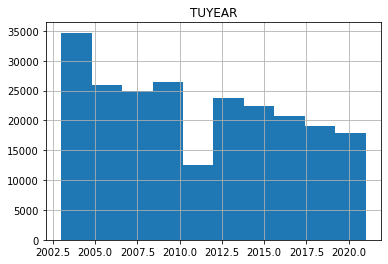

In [14]:
# Look at response rate by year
atus.hist(column='TUYEAR')

In [11]:
atus.TUYEAR.value_counts()

2003    20720
2004    13973
2010    13260
2009    13133
2005    13038
2006    12943
2008    12723
2011    12479
2012    12443
2007    12248
2014    11592
2013    11385
2015    10905
2016    10493
2017    10223
2018     9593
2019     9435
2021     9087
2020     8782
Name: TUYEAR, dtype: int64

# Create Age Groups to Match ATUS Age Groups

In [16]:
# used this site as a guide: https://datagy.io/pandas-conditional-column/

agegroup_conditions = [
    (atus['TEAGE'] <= 19),
    (atus['TEAGE'] > 19) & (atus['TEAGE'] <= 24),
    (atus['TEAGE'] > 24) & (atus['TEAGE'] <= 34),
    (atus['TEAGE'] > 34) & (atus['TEAGE'] <= 44),
    (atus['TEAGE'] > 44) & (atus['TEAGE'] <= 54),
    (atus['TEAGE'] > 54) & (atus['TEAGE'] <= 64),
    (atus['TEAGE'] > 54) & (atus['TEAGE'] <= 74),
    (atus['TEAGE'] > 74)


]

agegroup_values = ['15-19', '20-24', '25-34', '35-44',
         '45-54', '55-64', '65-74', '75+']
    
atus['TEAGEGROUP'] = np.select(agegroup_conditions, agegroup_values)
    
atus.head(20)

,TUCASEID,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,...,t181899,t189999,t500101,t500103,t500104,t500105,t500106,t500107,t509989,TEAGEGROUP
0,20030100013280,1,-1,44,2,2,60,2,2,-1,...,0,0,0,0,0,0,0,0,0,55-64
1,20030100013344,2,-1,40,2,1,41,1,2,2,...,0,0,0,0,0,0,0,0,0,35-44
2,20030100013352,1,-1,41,2,1,26,2,2,2,...,0,0,0,0,0,0,0,0,0,25-34
3,20030100013848,2,-1,39,2,2,36,4,-1,2,...,0,0,0,0,0,0,0,0,0,35-44
4,20030100014165,2,-1,45,2,1,51,1,2,-1,...,0,0,0,0,0,0,0,0,0,45-54
5,20030100014169,2,-1,43,2,1,32,2,2,1,...,0,0,0,0,0,0,0,0,0,25-34
6,20030100014209,1,-1,39,2,1,44,1,2,2,...,0,0,0,0,0,0,0,0,0,35-44
7,20030100014427,1,-1,40,2,1,21,1,2,2,...,0,0,0,0,0,0,0,0,0,20-24
8,20030100014550,2,-1,41,2,1,33,1,2,2,...,0,0,0,0,0,0,0,0,0,25-34
9,20030100014758,1,-1,41,2,2,39,1,2,2,...,0,0,0,0,0,0,0,0,0,35-44


Text(0, 0.5, '# of Respondents')

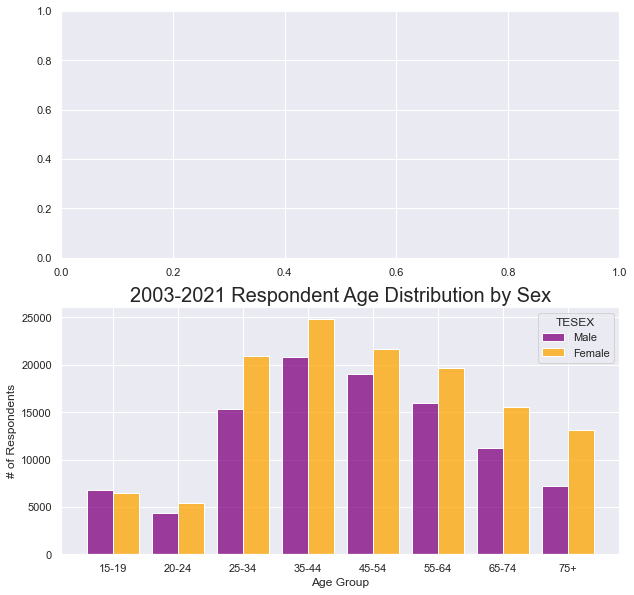

In [20]:
# Create histogram to investigate age and sex distribution of respondents 

sns.set_theme()

sexes = {1: 'Male', 2: 'Female'}

atus['TEAGEGROUP'] = pd.Categorical(atus['TEAGEGROUP'], agegroup_values)

fig, ax = plt.subplots(nrows=2, figsize=(10, 10))

sns.histplot(data=atus,
             x='TEAGEGROUP',
            hue=atus['TESEX'].map(sexes),
            multiple='dodge',
            shrink=.8,
            palette = {'Male': 'purple', 'Female': 'orange'})

plt.title("2003-2021 Respondent Age Distribution by Sex", fontsize = 20)
plt.xlabel("Age Group", fontsize = 12)
plt.ylabel("# of Respondents", fontsize = 12)


In [21]:
atus['TEAGEGROUP'].value_counts()

35-44    45681
45-54    40671
25-34    36261
55-64    35638
65-74    26744
75+      20332
15-19    13319
20-24     9809
Name: TEAGEGROUP, dtype: int64

# Examine Weight Columns

* Here, we find that 2019 has non-null (in the case of this dataset, "-1") values for the 2020 weight field, 'TU20FWGT'
* In half of the cases, the value for 'TUFNWGTP' matches that of 'TU20FWGT'
* However, instructions from ATUS are to use the 'TUFNWGTP' for all years besides 2020, so we will ignore the values in 'TU20FWGT' for 2019 data

In [24]:
# Multi-year weight column has null values (-1)

atus['TUFNWGTP'].value_counts()

-1.000000e+00    8782
 2.008844e+06       3
 1.949517e+06       3
 2.813615e+06       3
 3.204883e+06       3
                 ... 
 5.242562e+06       1
 3.329661e+06       1
 2.269699e+06       1
 5.751992e+06       1
 5.919170e+06       1
Name: TUFNWGTP, Length: 219137, dtype: int64

In [25]:
# 2020 weight column also has null values (-1)

atus['TU20FWGT'].value_counts()

-1.000000e+00    210238
 0.000000e+00      1466
 2.577357e+06         2
 4.368925e+06         2
 1.204585e+07         2
                  ...  
 3.489809e+07         1
 3.747515e+06         1
 1.541073e+07         1
 1.762280e+06         1
 2.892628e+06         1
Name: TU20FWGT, Length: 16717, dtype: int64

In [27]:
# Check if only 2020 respondents have a 2020 weight

weight_2020 = atus[atus['TU20FWGT'] > 0]
weight_2020['TUYEAR'].value_counts()

2020    8782
2019    7969
Name: TUYEAR, dtype: int64

In [31]:
# 7969 2019 respondents have a 2020 weight assigned
# Check if they also have a non-2020 weight

atus_2019 = atus[atus['TUYEAR'] == 2019]
atus_2019[['TU20FWGT', 'TUFNWGTP']]

,TU20FWGT,TUFNWGTP
201151,2.041308e+06,2.286291e+06
201152,4.710336e+07,5.372903e+07
201153,2.089510e+07,2.378910e+07
201154,2.898010e+07,2.224150e+07
201155,2.955963e+06,2.599757e+06
...,...,...
210581,4.120877e+06,4.120877e+06
210582,3.221949e+06,3.221949e+06
210583,6.548353e+06,6.548353e+06
210584,8.772119e+06,8.772119e+06


In [32]:
# Check all non-2020 weight values for 2019 respondents
atus_2019['TUFNWGTP'].value_counts()

9.274422e+06    2
1.289211e+07    2
4.587302e+06    2
3.766354e+06    2
5.807746e+06    2
               ..
1.765831e+06    1
7.716815e+06    1
7.548878e+06    1
3.789638e+06    1
1.072172e+07    1
Name: TUFNWGTP, Length: 9417, dtype: int64

In [33]:
# Check for 2019 respondents with two weights if the two weights are the same

weight_mismatch_2019 = atus_2019[atus['TU20FWGT'] != atus['TUFNWGTP']]
weight_mismatch_2019[['TU20FWGT', 'TUFNWGTP']].head(20)

/var/folders/b1/zqzn387j6zd37gnn4xj6ym200000gn/T/ipykernel_96099/1502177871.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weight_mismatch_2019 = atus_2019[atus['TU20FWGT'] != atus['TUFNWGTP']]


,TU20FWGT,TUFNWGTP
201151,2.041308e+06,2.286291e+06
201152,4.710336e+07,5.372903e+07
201153,2.089510e+07,2.378910e+07
201154,2.898010e+07,2.224150e+07
201155,2.955963e+06,2.599757e+06
201156,1.712934e+07,1.722316e+07
201157,7.075637e+06,5.515376e+06
201158,7.206595e+06,7.640780e+06
201159,2.779561e+06,2.865212e+06
201160,1.713219e+07,1.774828e+07


In [34]:
# Weights are not the same; decide to ignore 2020 weight for 2019 respondents